# Social Network Analysis with Python and NetworkX Library

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

Each graph has **Nodes** and **Edges**. Let's see how do we initialize a graph and how we add nodes and edges

In [2]:
G = nx.Graph()

# add nodes
G.add_nodes_from([1,2,3])

# add edges
G.add_edge(1,2)
G.add_edge(1,3)
# Let's see the nodes
f"The Nodes are {G.nodes()} and the Edges is {G.edges()}"



'The Nodes are [1, 2, 3] and the Edges is [(1, 2), (1, 3)]'

We can also add metadeta

In [3]:
G.node[1]['label'] = 'blue'

# if we want to print the results will be in a list of tuples
# where the first element is the node and the second element is a dictionary of the metadata

print(G.nodes(data=True))

[(1, {'label': 'blue'}), (2, {}), (3, {})]


### Twitter Network

We have provided a networkx file saved as pickle called `ego-twitter.p` which will be used as an example/

In [4]:
# Load the pickle file
T = pickle.load( open( "ego-twitter.p", "rb" ) )

In [5]:
T

In [6]:
# Because we love data frames let's see how does it look like
df = nx.to_pandas_edgelist(T)

df.head()

,source,target,date
0,1,3,2012-11-16
1,1,4,2013-06-07
2,1,5,2009-07-27
3,1,6,2014-12-18
4,1,7,2010-10-18


In [7]:
df.shape

(33142, 3)

In [8]:
f"The size of the graph is {T.size()} and it's length is {len(T)} the type of the T.nodes() is {type(T.nodes)} data structure of the third element of the last edge listed is {list(T.edges(data=True))[-1][2]['date']} "

"The size of the graph is 33142 and it's length is 23369 the type of the T.nodes() is <class 'networkx.classes.reportviews.NodeView'> data structure of the third element of the last edge listed is 2010-09-20 "

### Create a Network from Data Frame

Let's take a sample of our Data Frame `df` and let's create a network and represent it graphically!

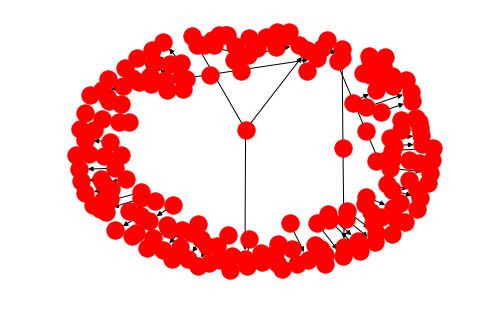

In [9]:
df_sample = df.sample(n=100,  random_state=5)
T2 = nx.from_pandas_edgelist(df_sample, 'source', 'target', ['date'], create_using=nx.DiGraph())

nx.draw(T2)

### Iterate over Network X

Let's have a look at the attributes of the our Network T 

In [10]:
list(T.nodes(data=True))[0:5]

[(1, {'category': 'I', 'occupation': 'politician'}),
 (3, {'category': 'D', 'occupation': 'celebrity'}),
 (4, {'category': 'I', 'occupation': 'politician'}),
 (5, {'category': 'I', 'occupation': 'scientist'}),
 (6, {'category': 'D', 'occupation': 'politician'})]

Let's get the list of nodes that have `occupation` label as `scientist`

In [11]:
# Use a list comprehension to get the nodes of interest: noi
noi = [n for n, d in T.nodes(data=True) if d['occupation'] == 'scientist']
noi[0:5]

[5, 9, 13, 15, 17]

Use a list comprehension to get a list of edges from the graph T that were formed for at least 6 years, i.e., from before 1 Jan 2010.

In [12]:
# Use a list comprehension to get the edges of interest: eoi
from datetime import date
eoi = [(u, v) for u, v, d in T.edges(data=True) if d['date'] < date(2010, 1, 1)]
eoi[0:5]

[(1, 5), (1, 9), (1, 13), (1, 15), (1, 16)]

## Types of Graphs

* Undirected Graphs like Facebook
* Directed Graphs like Twitter and Instagram (following and followers)
* Multi(Di)Graph like Trip records between bike sharing stations
* Graphs with Weights
* Self Loops which are nodes that ate connected to themselves

### Specifying a weight on edges

Weights can be added to edges in a graph, typically indicating the "strength" of an edge. In NetworkX, the weight is indicated by the `weight` key in the metadata dictionary.

The command of adding **weights** is:  
**network_name.edges[node1, node2]['attribute'] = value**  
where the `attribute` is the `weight` in our case

### Exercise

In [13]:
# Set the weight of the edge
T.edges[1, 10]['weight'] = 2

In [14]:
# Set the weight of every edge involving node 293 to be equal to 1.1. To do this:
# Iterate over all the edges (with metadata)
for u, v, d in T.edges(data=True):
    # Check if node 293 is involved
    if 293 in [u, v]:
        # Set the weight to 1.1
        T.edges[u,v]['weight']=1.1


### Checking for Self Loops

NetworkX also allows edges that begin and end on the same node; while this would be non-intuitive for a social network graph, it is useful to model data such as trip networks, in which individuals begin at one location and end in another.

It is useful to check for this before proceeding with further analyses, and NetworkX graphs provide a method for this purpose: `.number_of_selfloops()`.

In [15]:
# Define find_selfloop_nodes()
def find_selfloop_nodes(G):
    """
    Finds all nodes that have self-loops in the graph G.
    """
    nodes_in_selfloops = []
    
    # Iterate over all the edges of G
    for u, v in G.edges():
    
    # Check if node u and node v are the same
        if u==v:
        
            # Append node u to nodes_in_selfloops
            nodes_in_selfloops.append(u)
            
    return nodes_in_selfloops

# Check whether number of self loops equals the number of nodes in self loops
assert T.number_of_selfloops() == len(find_selfloop_nodes(T))

In [16]:
T.number_of_selfloops() 

42

In [17]:
len(find_selfloop_nodes(T))

42

## Visualizing Networks

* Matrix Plots
* Arc Plots
* Circos Plots

In [18]:
import nxviz as nv

In [50]:
# let's reload the twitter NetworkX and let's get the first 100 edges
# Load the pickle file
T = pickle.load( open( "ego-twitter.p", "rb" ) )

T2 = T.subgraph(list(T.nodes())[0:100])

In [51]:
T2

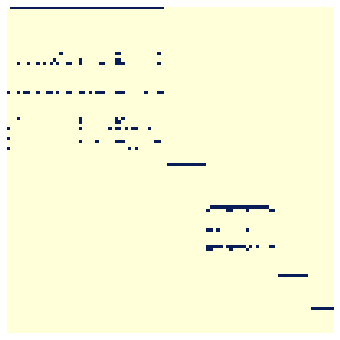

In [55]:
# Import nxviz
import nxviz as nv

# Create the MatrixPlot object: m
m = nv.MatrixPlot(T2)

# Draw m to the screen
m.draw()

# Display the plot
plt.show()

# Convert T to a matrix format: A
A = nx.to_numpy_matrix(T2)

# Convert A back to the NetworkX form as a directed graph: T_conv
T_conv = nx.from_numpy_matrix(A, create_using=nx.DiGraph())

# Check that the `category` metadata field is lost from each node
for n, d in T_conv.nodes(data=True):
    assert 'category' not in d.keys()

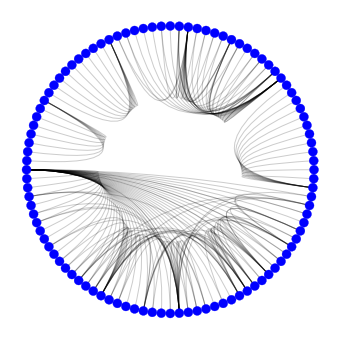

In [57]:
from nxviz import CircosPlot

# Create the CircosPlot object: c
c = CircosPlot(T2)

# Draw c to the screen
c.draw()


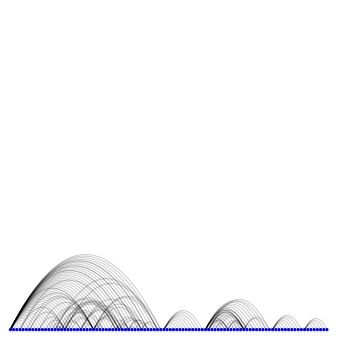

In [58]:
from nxviz import ArcPlot

# Create the un-customized ArcPlot object: a
a = ArcPlot(T2)

# Draw a to the screen
a.draw()

## Degree Centrality

* Which nodes are important?
    * Degree Centrality
    * Betweenness Centrality
    
    
The Degree Centrality can be defined as the ratio of:


$$\frac{Number~of~Neighbors~I~have}{Number~of~Neighbors~I~Could~Possibly~Have}$$



In [63]:
G = nx.Graph()


# add edges
G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(1,4)
G.add_edge(1,5)
G.add_edge(1,6)
G.add_edge(1,7)
G.add_edge(1,8)
G.add_edge(1,9)

In [64]:
G.edges()

EdgeView([(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9)])

In [74]:
list(G.neighbors(1))

[2, 3, 4, 5, 6, 7, 8, 9]

In [75]:
list(G.neighbors(5))

[1]

In [76]:
# Let's show the degree centrality of each node

nx.degree_centrality(G)

{1: 1.0,
 2: 0.125,
 3: 0.125,
 4: 0.125,
 5: 0.125,
 6: 0.125,
 7: 0.125,
 8: 0.125,
 9: 0.125}

### Compute number of neighbors for each node
How do you evaluate whether a node is an important one or not? There are a few ways to do so, and here, you're going to look at one metric: the number of neighbors that a node has.

Every NetworkX graph `G` exposes a `.neighbors(n)` method that returns a list of nodes that are the neighbors of the node `n`

**Exercise**

Write a function called `nodes_with_m_nbrs()` that has two parameters - `G` and `m` - and returns all nodes that have `m` neighbors. To do this:

* Iterate over all nodes in `G` (not including the metadata).
* Use the `len()` and `list()` functions together with the `.neighbors()` method to calculate the total number of neighbors that node `n` in graph `G` has.
    * If the number of neighbors of node n is equal to m, add n to the set nodes using the .add() method.
    * After iterating over all the nodes in G, return the set nodes.
* Use your nodes_with_m_nbrs() function to retrieve all the nodes that have 6 neighbors in the graph T.


In [82]:
# Define nodes_with_m_nbrs()
def nodes_with_m_nbrs(G, m):
    """
    Returns all nodes in graph G that have m neighbors.
    """
    nodes = set()
    
    # Iterate over all nodes in G
    for n in G.nodes():
    
        # Check if the number of neighbors of n matches m
        if len(list(G.neighbors(n))) == m:
        
            # Add the node n to the set
            nodes.add(n)
            
    # Return the nodes with m neighbors
    return nodes

# Compute and print all nodes in T that have 6 neighbors
six_nbrs = nodes_with_m_nbrs(T, 6)
print(six_nbrs)

{22533, 1803, 11276, 11279, 6161, 4261, 10149, 3880, 16681, 5420, 14898, 64, 14539, 6862, 20430, 9689, 475, 1374, 6112, 9186, 17762, 14956, 2927, 11764, 4725}


### Compute degree distribution
The number of neighbors that a node has is called its "degree", and it's possible to compute the degree distribution across the entire graph. In this exercise, your job is to compute the degree distribution across T.

In [104]:
# Compute the degree of every node: degrees
degrees = [len(list(T.neighbors(n))) for n in T.nodes()]

# Print the degrees
degrees[0:5]

[47, 0, 0, 0, 0]

### Degree centrality distribution

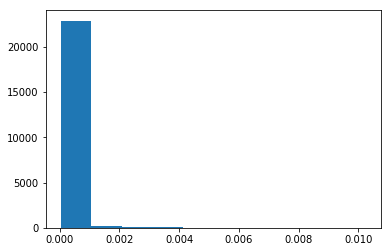

In [105]:
# Compute the degree centrality of the Twitter network: deg_cent
deg_cent = nx.degree_centrality(T)

# Plot a histogram of the degree centrality distribution of the graph.
plt.figure()
plt.hist(list(deg_cent.values()))
plt.show()

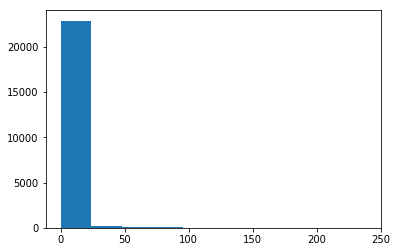

In [108]:
# Plot a histogram of the degree distribution of the graph
plt.figure()
plt.hist(degrees)
plt.show()

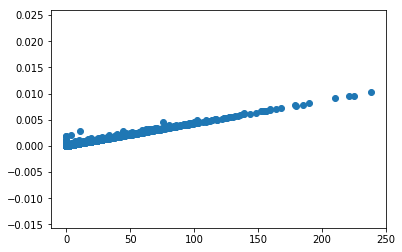

In [109]:
# Plot a scatter plot of the centrality distribution and the degree distribution
plt.figure()
plt.scatter(degrees,list(deg_cent.values()))
plt.show()

### Breadth-First Search (BFS)
**Shortest Path**

### Shortest Path I

You can leverage what you know about finding neighbors to try finding paths in a network. One algorithm for path-finding between two nodes is the "breadth-first search" (BFS) algorithm. In a BFS algorithm, you start from a particular node and iteratively search through its neighbors and neighbors' neighbors until you find the destination node.

Pathfinding algorithms are important because they provide another way of assessing node importance; you'll see this in a later exercise.

In this set of 3 exercises, you're going to build up slowly to get to the final BFS algorithm. The problem has been broken into 3 parts that, if you complete in succession, will get you to a first pass implementation of the BFS algorithm.

### Exercise

* Create a function called path_exists() that has 3 parameters - `G`, `node1`, and `node2` - and returns whether or not a path exists between the two nodes.
* Initialize the queue of nodes to visit with the first node, `node1`. queue should be a list.
* Iterate over the nodes in queue.
* Get the neighbors of the node using the `.neighbors()` method of the graph G.
* Check to see if the destination node node2 is in the set of neighbors. If it is, return True.

In [110]:
# Define path_exists()
def path_exists(G, node1, node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G.
    """
    visited_nodes = set()
    
    # Initialize the queue of cells to visit with the first node: queue
    queue = [node1]  
    
    # Iterate over the nodes in the queue
    for node in queue:
    
        # Get neighbors of the node
        neighbors = G.neighbors(node) 
        
        # Check to see if the destination node is in the set of neighbors
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
            break

### Shortset Path II

Now that you've got the code for checking whether the destination node is present in neighbors, next up, you're going to extend the same function to write the code for the condition where the destination node is not present in the neighbors.

All the code you need to write is in the else condition; that is, if `node2` is not in neighbors.


* Using the `.add()` method, add the current node node to the set `visited_nodes` to keep track of what nodes have already been visited.
* Add the neighbors of the current node `node` that have not yet been visited to queue. To do this, you'll need to use the `.extend()` method of queue together with a list comprehension. The `.extend()` method appends all the items in a given list.
* The output expression and iterator variable of the list comprehension are both `n`. The iterable is the list neighbors, and the conditional is if `n` is not in the visited nodes.

In [111]:
def path_exists(G, node1, node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G.
    """
    visited_nodes = set()
    queue = [node1]
    
    for node in queue:  
        neighbors = G.neighbors(node)
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
            break

        else:
            # Add current node to visited nodes
            visited_nodes.add(node)
            
            # Add neighbors of current node that have not yet been visited
            queue.extend([n for n in neighbors if n not in visited_nodes])

### Shortest Path III
Nnow going to complete the problem by writing the code that returns False if there's no path between two nodes.

* Check to see if the queue has been emptied. You can do this by inspecting the last element of queue with `[-1]`.
* Place the appropriate return statement for indicating whether there's a path between these two nodes.

In [112]:
def path_exists(G, node1, node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G.
    """
    visited_nodes = set()
    queue = [node1]
    
    for node in queue:  
        neighbors = G.neighbors(node)
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
            break

        else:
            visited_nodes.add(node)
            queue.extend([n for n in neighbors if n not in visited_nodes])
        
        # Check to see if the final element of the queue has been reached
        if node == queue[-1]:
            print('Path does not exist between nodes {0} and {1}'.format(node1, node2))

            # Place the appropriate return statement
            return False

## Betweenness Centrality
    
    
Definition:


$$\frac{Number~of~shortest~paths~through~node}{All~possible~shortest~paths}$$


### NetworkX betweenness centrality on a social network
Betweenness centrality is a node importance metric that uses information about the shortest paths in a network. It is defined as the fraction of all possible shortest paths between any pair of nodes that pass through the node.

NetworkX provides the `nx.betweenness_centrality(G)` function for computing the betweenness centrality of every node in a graph, and it returns a dictionary where the keys are the nodes and the values are their betweenness centrality measures.

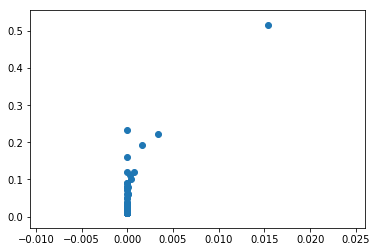

In [115]:
# Compute the betweenness centrality of T: bet_cen
bet_cen = nx.betweenness_centrality(T2)

# Compute the degree centrality of T: deg_cen
deg_cen = nx.degree_centrality(T2)

# Create a scatter plot of betweenness centrality and degree centrality
plt.scatter(list(bet_cen.values()), list(deg_cen.values()) )

# Display the plot
plt.show()

### Deep dive - Twitter network
You're going to now take a deep dive into a Twitter network, which will help reinforce what you've learned earlier. First, you're going to find the nodes that can broadcast messages very efficiently to lots of people one degree of separation away.

In [122]:
# Define find_nodes_with_highest_deg_cent()
def find_nodes_with_highest_deg_cent(G):

    # Compute the degree centrality of G: deg_cent
    deg_cent = nx.degree_centrality(G)
    
    # Compute the maximum degree centrality: max_dc
    max_dc = max(list(deg_cent.values()))
    
    nodes = set()
    
    # Iterate over the degree centrality dictionary
    for k, v in deg_cent.items():
    
        # Check if the current value has the maximum degree centrality
        if v == max_dc:
        
            # Add the current node to the set of nodes
            nodes.add(k)
            
    return nodes
    
# Find the node(s) that has the highest degree centrality in T: top_dc
top_dc = find_nodes_with_highest_deg_cent(T)
print(top_dc)

# Write the assertion statement
for node in top_dc:
    assert nx.degree_centrality(T)[node] == max(nx.degree_centrality(T).values())

{11824}


### Deep dive - Twitter network part II
Next, you're going to do an analogous deep dive on betweenness centrality! Just a few hints to help you along: remember that betweenness centrality is computed using `nx.betweenness_centrality(G)`.

In [124]:
# Define find_node_with_highest_bet_cent()
def find_node_with_highest_bet_cent(G):

    # Compute betweenness centrality: bet_cent
    bet_cent = nx.betweenness_centrality(G)
    
    # Compute maximum betweenness centrality: max_bc
    max_bc = max(list(bet_cent.values()))
    
    nodes = set()
    
    # Iterate over the betweenness centrality dictionary
    for k, v in bet_cent.items():
    
        # Check if the current value has the maximum betweenness centrality
        if v == max_bc:
        
            # Add the current node to the set of nodes
            nodes.add(k)
            
    return nodes

# Use that function to find the node(s) that has the highest betweenness centrality in the network: top_bc
top_bc = find_node_with_highest_bet_cent(T2)

# Write an assertion statement that checks that the node(s) is/are correctly identified.
for node in top_bc:
    assert nx.betweenness_centrality(T2)[node] == max(nx.betweenness_centrality(T2).values())

## Cliques

Completely connected graphs

Triangle applications, Triangle closures

### Identifying triangle relationships
Now that you've learned about cliques, it's time to try leveraging what you know to find structures in a network. Triangles are what you'll go for first. We may be interested in triangles because they're the simplest complex clique. Let's write a few functions; these exercises will bring you through the fundamental logic behind network algorithms.

In the Twitter network, each node has an 'occupation' label associated with it, in which the Twitter user's work occupation is divided into celebrity, politician and scientist. One potential application of triangle-finding algorithms is to find out whether users that have similar occupations are more likely to be in a clique with one another.

In [140]:
# converted the sub directed graph T2 to undirected 
T3 = T2.to_undirected()

In [127]:
from itertools import combinations

# Define is_in_triangle() 
def is_in_triangle(G, n):
    """
    Checks whether a node `n` in graph `G` is in a triangle relationship or not. 
    
    Returns a boolean.
    """
    in_triangle = False
    
    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):
    
        # Check if an edge exists between n1 and n2
        if G.has_edge(n1, n2):
            in_triangle = True
            break
    return in_triangle

### Finding nodes involved in triangles
NetworkX provides an API for counting the number of triangles that every node is involved in: `nx.triangles(G)`. It returns a dictionary of nodes as the keys and number of triangles as the values. Your job in this exercise is to modify the function defined earlier to extract all of the nodes involved in a triangle relationship with a given node.

In [146]:
from itertools import combinations

# Write a function that identifies all nodes in a triangle relationship with a given node.
def nodes_in_triangle(G, n):
    """
    Returns the nodes in a graph `G` that are involved in a triangle relationship with the node `n`.
    """
    triangle_nodes = set([n])
    
    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):
    
        # Check if n1 and n2 have an edge between them
        if G.has_edge(n1, n2):
        
            # Add n1 to triangle_nodes
            triangle_nodes.add(n1)
            
            # Add n2 to triangle_nodes
            triangle_nodes.add(n2)
            
    return triangle_nodes
    


### Finding open triangles
Let us now move on to finding open triangles! Recall that they form the basis of friend recommendation systems; if "A" knows "B" and "A" knows "C", then it's probable that "B" also knows "C".

In [149]:
from itertools import combinations

# Define node_in_open_triangle()
def node_in_open_triangle(G, n):
    """
    Checks whether pairs of neighbors of node `n` in graph `G` are in an 'open triangle' relationship with node `n`.
    """
    in_open_triangle = False
    
    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):
    
        # Check if n1 and n2 do NOT have an edge between them
        if not G.has_edge(n1, n2):
        
            in_open_triangle = True
            
            break
            
    return in_open_triangle

# Compute the number of open triangles in T
num_open_triangles = 0

# Iterate over all the nodes in T
for n in list(T3.nodes()):

    # Check if the current node is in an open triangle
    if node_in_open_triangle(T3,n):
    
        # Increment num_open_triangles
        num_open_triangles += 1
        
print(num_open_triangles)

29


### Maximal Cliques

A clique that, when extended by one node is no longer a clique

C:\Users\pipinho\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


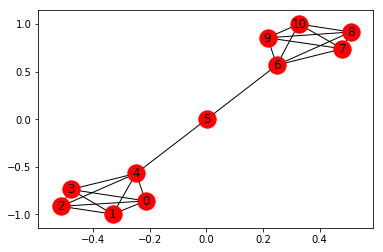

In [155]:
G = nx.barbell_graph(m1=5, m2=1)

nx.draw_networkx(G)

In [156]:
list(nx.find_cliques(G))

[[4, 0, 1, 2, 3], [4, 5], [6, 5], [6, 7, 8, 9, 10]]

### Finding all maximal cliques of size "n"
Now that you've explored triangles (and open triangles), let's move on to the concept of maximal cliques. Maximal cliques are cliques that cannot be extended by adding an adjacent edge, and are a useful property of the graph when finding communities. NetworkX provides a function that allows you to identify the nodes involved in each maximal clique in a graph: nx.find_cliques(G). Play around with the function by using it on T in the IPython Shell, and then try answering the exercise.

In [158]:
# Define maximal_cliques()
def maximal_cliques(G,size):
    """
    Finds all maximal cliques in graph `G` that are of size `size`.
    """
    mcs = []
    for clique in nx.find_cliques(G):
        if len(clique) == size:
            mcs.append(clique)
    return mcs

len(maximal_cliques(T3,3))

42

## Subgraphs

C:\Users\pipinho\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


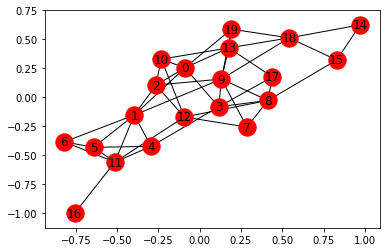

In [161]:
G = nx.erdos_renyi_graph(n=20, p=0.2)
nx.draw_networkx(G)

In [162]:
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19))

In [169]:
nodes = list(G.neighbors(8))
nodes.append(8)
nodes

[3, 7, 9, 12, 15, 17, 8]

In [170]:
G_eight = G.subgraph(nodes)

C:\Users\pipinho\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


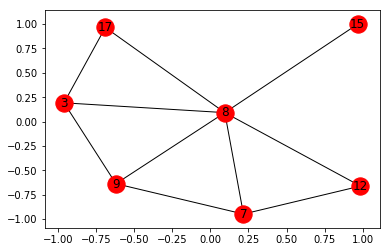

In [171]:
nx.draw_networkx(G_eight)

In [172]:
G_eight.edges()

EdgeView([(3, 8), (3, 9), (3, 17), (7, 8), (7, 9), (7, 12), (8, 9), (8, 12), (8, 15), (8, 17)])

### Subgraphs I
There may be times when you just want to analyze a subset of nodes in a network. To do so, you can copy them out into another graph object using G.subgraph(nodes), which returns a new graph object (of the same type as the original graph) that is comprised of the iterable of nodes that was passed in.

matplotlib.pyplot has been imported for you as plt.

C:\Users\pipinho\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


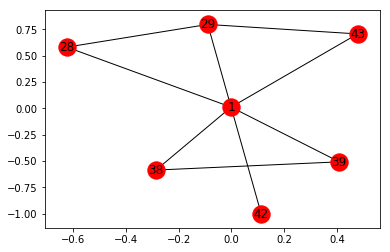

In [175]:
nodes_of_interest = [29, 38, 42]

# Define get_nodes_and_nbrs()
def get_nodes_and_nbrs(G, nodes_of_interest):
    """
    Returns a subgraph of the graph `G` with only the `nodes_of_interest` and their neighbors.
    """
    nodes_to_draw = []
    
    # Iterate over the nodes of interest
    for n in nodes_of_interest:
    
        # Append the nodes of interest to nodes_to_draw
        nodes_to_draw.append(n)
        
        # Iterate over all the neighbors of node n
        for nbr in G.neighbors(n):
        
            # Append the neighbors of n to nodes_to_draw
            nodes_to_draw.append(nbr)
            
    return G.subgraph(nodes_to_draw)

# Extract the subgraph with the nodes of interest: T_draw
T_draw = get_nodes_and_nbrs(T3
                            , nodes_of_interest)

# Draw the subgraph to the screen
nx.draw_networkx(T_draw)

### Subgraphs II
In the previous exercise, we gave you a list of nodes whose neighbors we asked you to extract.

Let's try one more exercise in which you extract nodes that have a particular metadata property and their neighbors. This should hark back to what you've learned about using list comprehensions to find nodes. The exercise will also build your capacity to compose functions that you've already written before.

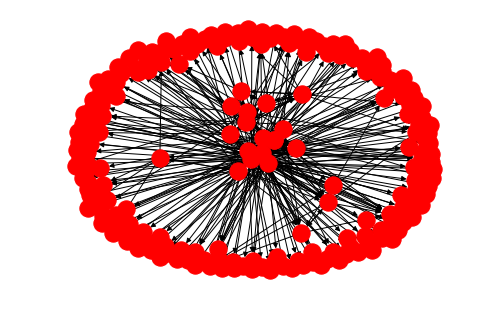

In [178]:
# Extract the nodes of interest: nodes
nodes = [n for n, d in T3.nodes(data=True) if d['occupation'] == 'celebrity']

# Create the set of nodes: nodeset
nodeset = set(nodes)

# Iterate over nodes
for n in nodes:

    # Compute the neighbors of n: nbrs
    nbrs = T.neighbors(n)
    
    # Compute the union of nodeset and nbrs: nodeset
    nodeset = nodeset.union(nbrs)

# Compute the subgraph using nodeset: T_sub
T_sub = T.subgraph(nodeset)

# Draw T_sub to the screen
nx.draw(T_sub)

## Case Study

Github collaboration network

* Nodes are the users
* Edges: Collaboration on same GitHub repository

Goals:

* Analyze the struture
* Visualize
* Build a simple recommendation system

In [179]:
# let's load the github_users network
# Load the pickle file
G = pickle.load( open( "github_users.p", "rb" ) )

In [180]:
G

In [181]:
# As we can see it is an undirected graph

# number of nodes and number of edges

print(len(G.nodes()))

56519


In [182]:
print(len(G.edges()))

72900


In [207]:
G2 = G.subgraph(list(G.nodes())[0:100])

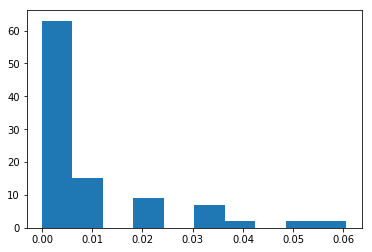

In [208]:
# Plot the degree distribution of the GitHub collaboration network
plt.hist(list(nx.degree_centrality(G2).values()))
plt.show()

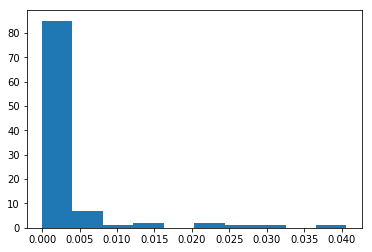

In [209]:
# Plot the degree distribution of the GitHub collaboration network
plt.hist(list(nx.betweenness_centrality(G2).values()))
plt.show()


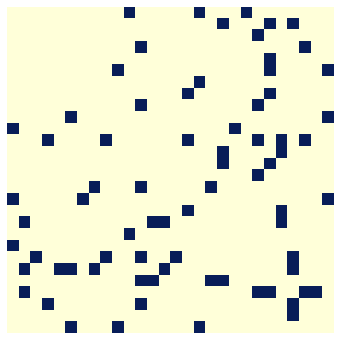

In [210]:
from nxviz import MatrixPlot
# Calculate the largest connected component subgraph: largest_ccs
largest_ccs = sorted(nx.connected_component_subgraphs(G2), key=lambda x: len(x))[-1]

# Create the customized MatrixPlot object: h
h = MatrixPlot(graph=largest_ccs)

# Draw the MatrixPlot to the screen
h.draw()
plt.show()

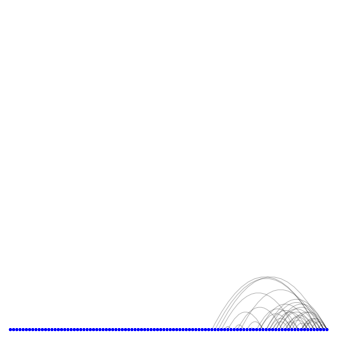

In [211]:
from nxviz.plots import ArcPlot

# Iterate over all the nodes in G, including the metadata
for n, d in G2.nodes(data=True):

    # Calculate the degree of each node: G.node[n]['degree']
    G2.node[n]['degree'] = nx.degree(G2, n)
    
# Create the ArcPlot object: a
a = ArcPlot(graph=G2, node_order='degree')

# Draw the ArcPlot to the screen
a.draw()
plt.show()

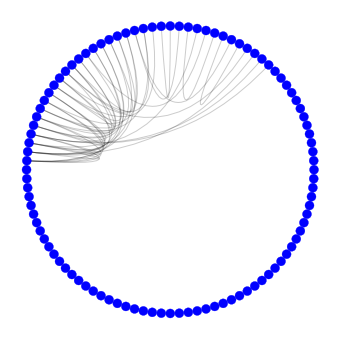

In [215]:
from nxviz import CircosPlot

# Iterate over all the nodes, including the metadata
for n, d in G2.nodes(data=True):

    # Calculate the degree of each node: G.node[n]['degree']
    G2.node[n]['degree'] = nx.degree(G2, n)

# Create the CircosPlot object: c
c = CircosPlot(G2, node_order='degree')

# Draw the CircosPlot object to the screen
c.draw()
plt.show()

In [226]:
# Calculate the maximal cliques in G: cliques
cliques = nx.find_cliques(G)

# Count and print the number of maximal cliques in G
print(len(list(cliques)))

54083


In [227]:
list(nx.find_cliques(G))[0:10]

[['u191',
  'u10803',
  'u2558',
  'u3670',
  'u9767',
  'u7682',
  'u9358',
  'u4671',
  'u1418',
  'u4030',
  'u7453',
  'u7308',
  'u2613',
  'u39',
  'u2516',
  'u9281',
  'u9015',
  'u3975',
  'u322',
  'u2099',
  'u7558'],
 ['u23568'],
 ['u17732'],
 ['u45551'],
 ['u42301'],
 ['u17263'],
 ['u26886'],
 ['u22652'],
 ['u46803'],
 ['u38780']]

In [228]:
# Find the author(s) that are part of the largest maximal clique: largest_clique
largest_clique = sorted(nx.find_cliques(G), key=lambda x:len(x))[-1]
largest_clique[0:10]

['u741',
 'u1571',
 'u7025',
 'u719',
 'u724',
 'u698',
 'u3075',
 'u5470',
 'u3841',
 'u4209']

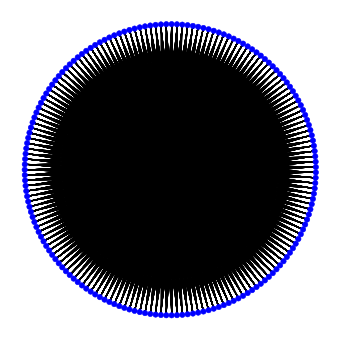

In [229]:
# Create the subgraph of the largest_clique: G_lc
G_lc = G.subgraph(largest_clique)



# Create the CircosPlot object: c
c = CircosPlot(G_lc)

# Draw the CircosPlot to the screen
c.draw()
plt.show()

### Finding important collaborators

In [230]:
# Compute the degree centralities of G: deg_cent
deg_cent = nx.degree_centrality(G)
# Compute the maximum degree centrality: max_dc
max_dc = max(deg_cent.values())

In [231]:
max_dc

0.005768073887964896

In [232]:
# Find the user(s) that have collaborated the most: prolific_collaborators
prolific_collaborators = [n for n, dc in deg_cent.items() if dc == max_dc]


In [234]:
# Print the most prolific collaborator(s)
print(prolific_collaborators)

['u741']


### Recommending co-editors who have yet to edit together

In [238]:
# Import necessary modules
from itertools import combinations
from collections import defaultdict

# Initialize the defaultdict: recommended
recommended = defaultdict(int)

# Iterate over all the nodes in G
for n, d in G.nodes(data = True):

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):
    
        # Check whether n1 and n2 do not have an edge
        if not G.has_edge(n1, n2):
        
            # Increment recommended
            recommended[(n1, n2)] += 1

# Identify the top 10 pairs of users
all_counts = sorted(recommended.values())
top10_pairs = [pair for pair, count in recommended.items() if count > all_counts[-10]]
print(top10_pairs)


[('u264', 'u655'), ('u627', 'u3082'), ('u363', 'u1208'), ('u89', 'u325'), ('u741', 'u935'), ('u268', 'u741')]


In [249]:
all_counts[-10]

12